# Category > Appliances

# 


In [16]:
# ! pip install pandas --quiet
# ! pip install matplotlib --quiet

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [18]:
adf = pd.read_json('../data/Appliances/Appliances.jsonl',lines=True)

In [19]:
adf.shape

(2128605, 10)

In [20]:
adf.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Work great,work great. use a new one every month,[],B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2018-02-22 16:31:48.692,0,True
1,5,excellent product,Little on the thin side,[],B07DD2DMXB,B07DD37QPZ,AHWWLSPCJMALVHDDVSUGICL6RUCA,2022-10-02 21:41:03.446,0,True
2,5,Happy customer!,"Quick delivery, fixed the issue!",[],B082W3Z9YK,B082W3Z9YK,AHZIJGKEWRTAEOZ673G5B3SNXEGQ,2020-12-06 03:30:35.363,0,True
3,5,Amazing value,I wasn't sure whether these were worth it or n...,[],B078W2BJY8,B078W2BJY8,AFGUPTDFAWOHHL4LZDV27ERDNOYQ,2018-08-12 20:03:04.306,0,True
4,5,Dryer parts,Easy to install got the product expected to re...,[],B08C9LPCQV,B08C9LPCQV,AELFJFAXQERUSMTXJQ6SYFFRDWMA,2021-05-05 01:03:23.754,0,True


Mean =  20.42081986242889
Median =  3.0


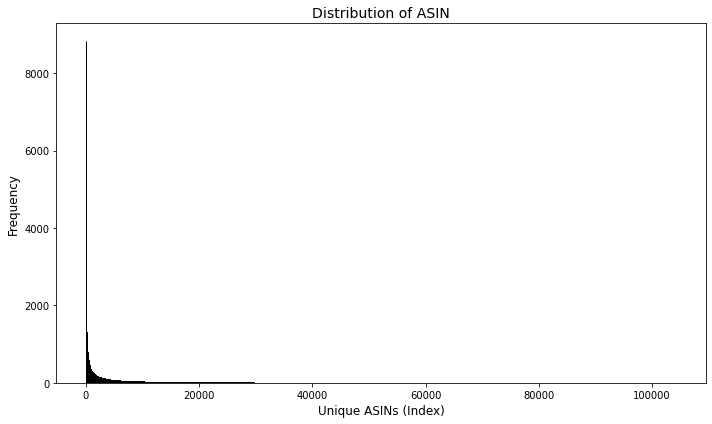

In [21]:
value_counts = adf['asin'].value_counts()
print("Mean = ",value_counts.mean())
print("Median = ",value_counts.median())
plt.figure(figsize=(10, 6))
plt.bar(range(len(value_counts)), value_counts, color='skyblue', edgecolor='black')
plt.title('Distribution of ASIN', fontsize=14)
plt.xlabel('Unique ASINs (Index)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

**Filter products with more than 500 reviews**

In [22]:
filtered_asins = value_counts[value_counts >= 500].index
filtered_adf = adf[adf['asin'].isin(filtered_asins)]
filtered_adf.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Work great,work great. use a new one every month,[],B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2018-02-22 16:31:48.692,0,True
6,2,They don't fit properly,Not the best quality,[],B001TH7GZA,B001TH7H0O,AHCV2CNCOCG6WECDROOUYPDZIFEQ,2021-01-09 19:03:43.865,0,True
10,4,Easy use coffee scoop.,Love little kitchen gadgets. Would recommend ...,[],B01AML6LT0,B09CBF2XCF,AHPUT3ITXCHQJO7OMF74LEMYHIVA,2021-03-17 21:09:01.916,0,True
12,5,Perfect !!!,i have a K15 and was concerned it wouldnt fit ...,[],B07BFGZQ65,B07BFGZQ65,AHGAOIZVODNHYMNCBV4DECZH42UQ,2018-07-02 21:18:12.904,5,True
15,5,great,worked great,[],B00009W3HD,B08FDB6W59,AHGAOIZVODNHYMNCBV4DECZH42UQ,2017-12-18 00:35:34.944,0,True


In [23]:
# Group by 'asin' and apply transformations
result = filtered_adf.groupby('asin').apply(
    lambda group: pd.Series({
        'reviews': [{'review_title': title, 'review_text': text} for title, text in zip(group['title'], group['text'])],
        'total_reviews': len(group),
        'first_review_date': group['timestamp'].min(),
        'last_review_date': group['timestamp'].max(),
        'helpful_votes': group['helpful_vote'].tolist(),
        'verified_purchase': group['verified_purchase'].tolist()
    })
).reset_index()

# Serialize complex data types to JSON strings for saving in CSV
result['reviews'] = result['reviews'].apply(json.dumps)
result['helpful_votes'] = result['helpful_votes'].apply(json.dumps)
result['verified_purchase'] = result['verified_purchase'].apply(json.dumps)

# Save to CSV


> :warning: **Saves a csv file!**

In [28]:
result.shape

(576, 7)

In [24]:
# result.to_csv('../data/Appliances/eda-appliances.csv', index=False)

In [26]:
# # Load the CSV
# test = pd.read_csv('../data/Appliances/eda-appliances.csv')

# # Deserialize JSON strings back into Python objects
# test['reviews'] = test['reviews'].apply(json.loads)
# test['helpful_votes'] = test['helpful_votes'].apply(json.loads)
# test['verified_purchase'] = test['verified_purchase'].apply(json.loads)

# # Verify data types
# print(type(test.loc[0, 'reviews']))  # Should be a list of dicts
# print(type(test.loc[0, 'helpful_votes']))  # Should be a list of ints
# print(type(test.loc[0, 'verified_purchase']))  # Should be a list of booleans

In [27]:
top10 = value_counts.head(20)
top10

asin
B01DLEL4EM    8848
B000AST3AK    7030
B00LGEKOMS    6984
B01KJ2FVFW    6140
B00UXG4WR8    5896
B000DLB2FI    5736
B01MT0UL8N    5345
B01BIDPHYQ    5299
B0045LLC7K    5243
B003N1ZSYG    5132
B002JAKRAM    5042
B01DP1IWKU    4903
B014W1C2VM    4873
B01ALBMIEI    4251
B07YF9SGBW    4236
B01CA34OU6    4162
B009PCI2JU    4078
B01KKUFW34    3992
B06XR8WZX6    3598
B01KJUC2JC    3532
Name: count, dtype: int64

In [ ]:
bottom10 = value_counts.tail(10)
bottom10

In [ ]:
top_n = 10 
value_counts.head(top_n).plot(kind='bar', color='skyblue', edgecolor='black')

In [ ]:
adf[adf['asin']=='B000063XJL']